In [18]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

# Load data
housing = fetch_california_housing()
X = housing.data
y = housing.target

X = MinMaxScaler().fit_transform(X)

# Define the desired number of data points
desired_num_samples = 400  # Adjust this as needed

# Randomly sample data points
# set the seed to ensure reproducibility
np.random.seed(42)
random_indices = np.random.choice(len(X), desired_num_samples, replace=False)
X_subset = X[random_indices]
y_subset = y[random_indices]


In [19]:
# split into train and test
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.5, random_state=42)

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
# define model
model = XGBRegressor()

# define search space
param_grid = dict()
param_grid['n_estimators'] = [100, 500, 1000]
param_grid['max_depth'] = [3, 7, 9]
param_grid['learning_rate'] = [0.01, 0.1, 0.2]
param_grid['gamma'] = [0, 0.1, 0.5]
param_grid['reg_alpha'] = [0, 0.1, 1]
param_grid['reg_lambda'] = [0, 0.1, 1]

# define search
search = RandomizedSearchCV(model, param_grid, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42)

# execute search
result = search.fit(X_train_subset, y_train_subset)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Model: %s' % result.best_estimator_)
print('Best Model Score: %s' % result.best_estimator_.score(X_test_subset, y_test_subset))

Best Score: -0.46421118501647174
Best Hyperparameters: {'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0}
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Model Score: 0.6208279350030074


TRAINING SCORE AT START: 0.9680080330814869
TEST SCORE AT START: 0.6208279350030074
TRAINING MSE AT START: 0.03901698202440906
TEST MSE AT START: 0.5446762231432342


Text(0, 0.5, 'Predicted Values')

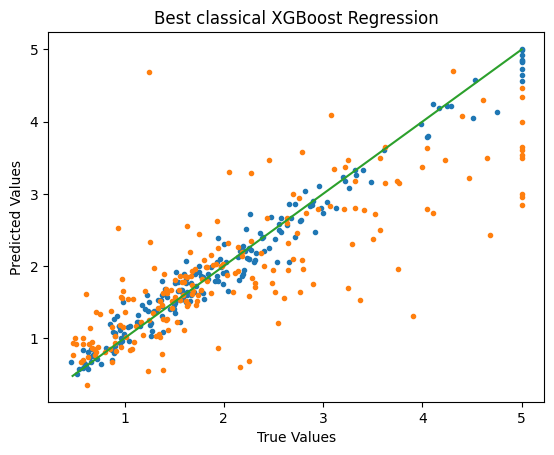

In [21]:
import matplotlib.pyplot as plt
# perform best xgboost regression
xgb = result.best_estimator_
Y1 = xgb.predict(X_train_subset)
Y2 = xgb.predict(X_test_subset)
training_score = xgb.score(X_train_subset,y_train_subset)
test_score = xgb.score(X_test_subset,y_test_subset)
print("TRAINING SCORE AT START:",training_score)
print("TEST SCORE AT START:",test_score)
print("TRAINING MSE AT START:",mean_squared_error(y_train_subset,Y1))
print("TEST MSE AT START:",mean_squared_error(y_test_subset,Y2))
plt.figure()
plt.title("Best classical XGBoost Regression")
plt.plot(y_train_subset,Y1,'.', label=f"Training Data and Training Score (R2={training_score:.2f})")
plt.plot(y_test_subset,Y2,'.', label=f"Test Data and Test Score (R2={test_score:.2f})")
plt.plot([np.min(y_test_subset),np.max(y_test_subset)],[np.min(y_test_subset),np.max(y_test_subset)])
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

TRAINING SCORE AT START: 0.5632394702556557
TEST SCORE AT START: 0.5513914611417707
TRAINING MSE AT START: 0.5326673968315814
TEST MSE AT START: 0.6444209032567921


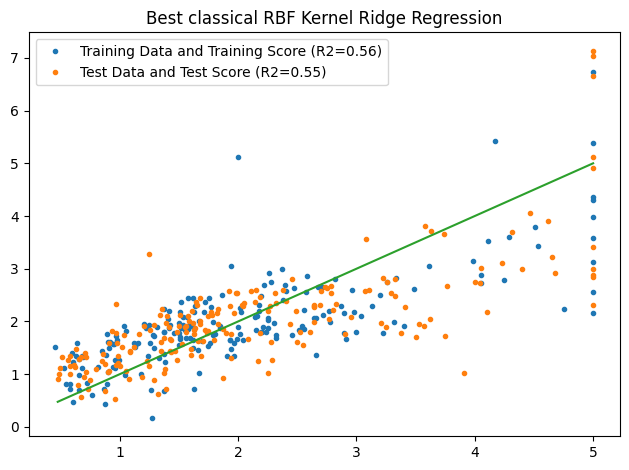

In [22]:
from scipy.stats import uniform
from scipy.stats import expon

# define model
krr = KernelRidge()

# define search space
param_grid = dict()
param_grid['alpha'] = uniform(loc=0, scale=1)
param_grid['gamma'] = expon(loc=0, scale=1)

# define search
search_krr = RandomizedSearchCV(krr, param_grid, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42)

# execute search
result_krr = search_krr.fit(X_train_subset, y_train_subset)

krr = result_krr.best_estimator_
Y1 = krr.predict(X_train_subset)
Y2 = krr.predict(X_test_subset)
training_score = krr.score(X_train_subset,y_train_subset)
test_score = krr.score(X_test_subset,y_test_subset)
print("TRAINING SCORE AT START:",training_score)
print("TEST SCORE AT START:",test_score)
print("TRAINING MSE AT START:",mean_squared_error(y_train_subset,Y1))
print("TEST MSE AT START:",mean_squared_error(y_test_subset,Y2))
plt.figure()
plt.title("Best classical RBF Kernel Ridge Regression")
plt.plot(y_train_subset,Y1,'.', label=f"Training Data and Training Score (R2={training_score:.2f})")
plt.plot(y_test_subset,Y2,'.', label=f"Test Data and Test Score (R2={test_score:.2f})")
plt.plot([np.min(y_test_subset),np.max(y_test_subset)],[np.min(y_test_subset),np.max(y_test_subset)])
plt.legend(loc="upper left")
plt.tight_layout()       


In [26]:
print("best parameters for krr:",result_krr.best_params_)

best parameters for krr: {'alpha': 0.005522117123602399, 'gamma': 1.689896777486126}


In [23]:
from squlearn.kernel.matrix import ProjectedQuantumKernel, FidelityKernel
from squlearn.util import Executor
from squlearn.kernel.ml import QKRR, QSVR

In [24]:
from squlearn.feature_map import QEKFeatureMap, ChebPQC, YZ_CX_FeatureMap, HZCRxCRyCRz
qek_map = QEKFeatureMap(num_qubits=8, num_features=8, num_layers=1)

TRAINING SCORE AT START: 0.8676295065389511
TEST SCORE AT START: -0.07710556788643785
TRAINING MSE AT START: 0.16143731259434355
TEST MSE AT START: 1.547249512296183


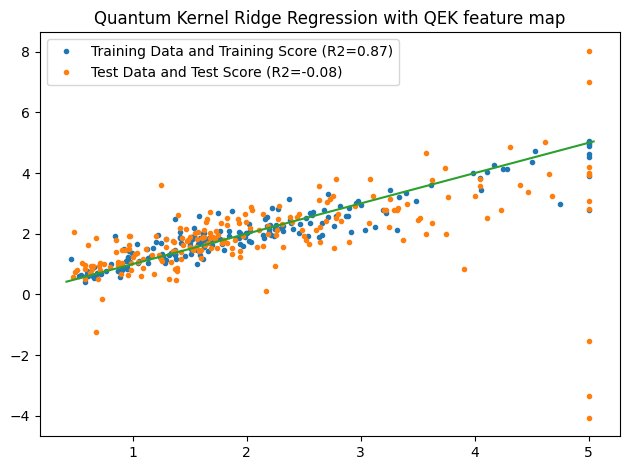

In [30]:
qek_kernel_sub = ProjectedQuantumKernel(qek_map,Executor("statevector_simulator"),parameter_seed=0, gamma=1.68)
qek_krr_sub = QKRR(quantum_kernel=qek_kernel_sub, alpha=0.0001)
qek_krr_sub.fit(X_train_subset,y_train_subset)

Y1_qek = qek_krr_sub.predict(X_train_subset)
Y2_qek = qek_krr_sub.predict(X_test_subset)

training_score_qek = qek_krr_sub.score(X_train_subset,y_train_subset)
test_score_qek = qek_krr_sub.score(X_test_subset,y_test_subset)
print("TRAINING SCORE AT START:",qek_krr_sub.score(X_train_subset,y_train_subset))
print("TEST SCORE AT START:",qek_krr_sub.score(X_test_subset,y_test_subset))
print("TRAINING MSE AT START:",mean_squared_error(y_train_subset,Y1_qek))
print("TEST MSE AT START:",mean_squared_error(y_test_subset,Y2_qek))
plt.figure()
plt.title("Quantum Kernel Ridge Regression with QEK feature map")
plt.plot(y_train_subset,Y1_qek,'.', label=f"Training Data and Training Score (R2={training_score_qek:.2f})")
plt.plot(y_test_subset,Y2_qek,'.', label=f"Test Data and Test Score (R2={test_score_qek:.2f})")
plt.plot([np.min(Y1_qek),np.max(Y1_qek)],[np.min(Y1_qek),np.max(Y1_qek)])
plt.legend(loc="upper left")
plt.tight_layout()


In [ ]:
Rx(p,x;=y*np.cos(x),{y,x})-Ry(p,x;=y*(x),{y,x})-cx-Ry(p,x;=y*(x),{y,x})
